# Decision Tree Classifier For Iris Dataset

## Author : Rahul Kulkarni

### Problem Statement: 
Create a decision tree classifier for the dataset and visualize it graphically

### Importing required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Exploratory Data Analysis

In [10]:
iris_df = pd.read_csv('D:\GRIP_Tasks\Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


This is a classification problem since the target variable is of categorical type. We have 4 independant variables Sepal Length, Sepal Width, Petal Length and Petal Width all of which have the cm unit. The target variable is Species which falls into 3 categories Iris_setosa, Iris-versicolor and Iris-virginica.

Let's group the data by the species and have a look at various mathematical attributes like mean, mode, range etc.

In [14]:
iris_df.groupby('Species').describe()

Id                                                        \
                count   mean       std    min     25%    50%     75%    max   
Species                                                                       
Iris-setosa      50.0   25.5  14.57738    1.0   13.25   25.5   37.75   50.0   
Iris-versicolor  50.0   75.5  14.57738   51.0   63.25   75.5   87.75  100.0   
Iris-virginica   50.0  125.5  14.57738  101.0  113.25  125.5  137.75  150.0   

                SepalLengthCm         ... PetalLengthCm      PetalWidthCm  \
                        count   mean  ...           75%  max        count   
Species                               ...                                   
Iris-setosa              50.0  5.006  ...         1.575  1.9         50.0   
Iris-versicolor          50.0  5.936  ...         4.600  5.1         50.0   
Iris-virginica           50.0  6.588  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 40 columns]

Each of the species have equal number of data points (50) and we can see an increasing trend of their means. Let's take a better look at the data with the help of a boxplot.

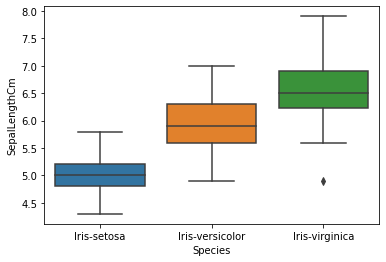

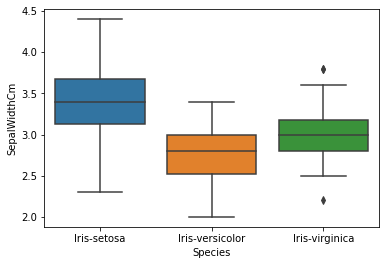

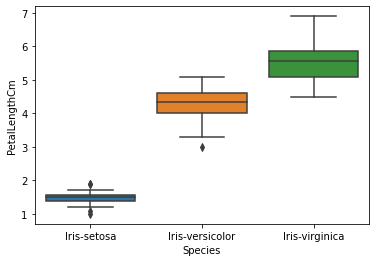

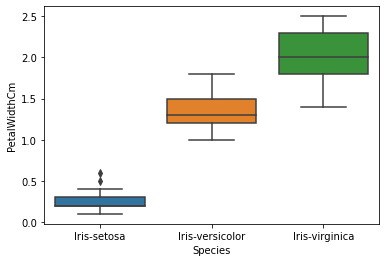

In [18]:
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for feature in features:
    sns.boxplot(x='Species',y=feature,data = iris_df)
    plt.show()

From the above box plots the relation between:
1. SepalLength and Species: It is a linearly increasing relation.
2. SepalWitdth and Species: It looks like an exponential relation due to the U- shaped curve formed.
3. PetalLength,PetalWidth and Species: It is a linearly incresing relation with higher slope.

Let's take a look at the distribution plots to find any overlaps between variables.

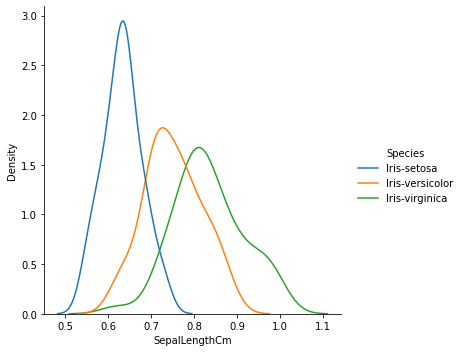

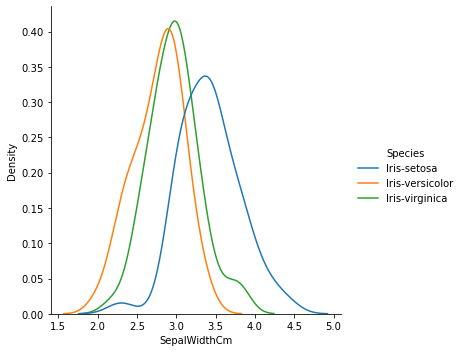

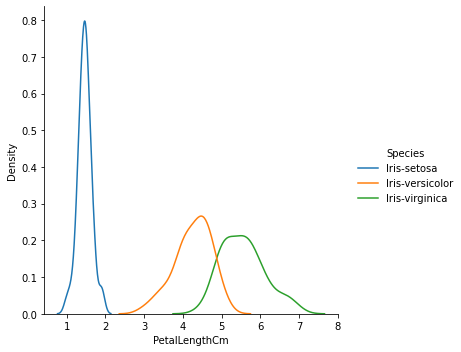

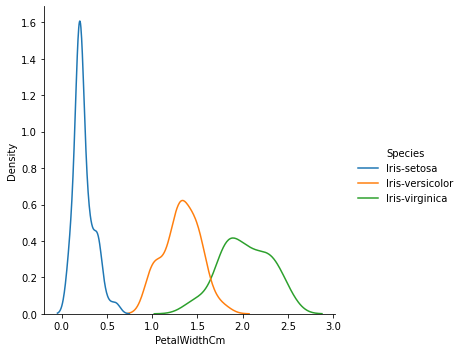

In [31]:
for feature in features:
    sns.displot(x=feature,data=iris_df,hue='Species',kind='kde')
    plt.show()

As we can see from the distribution plot of SepalWidth there is high overlap between the species and from the SepalLength plot we can observe a slight overlap. But from the petal features plot we can observe that there is an slight overlap between Iris-versicolor and Iris-virginica but none of them overlap with Iris-setosa.

### Modelling

It's clear that this is a classification modelling problem and we will use a decision tree classifier to predict the species.

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

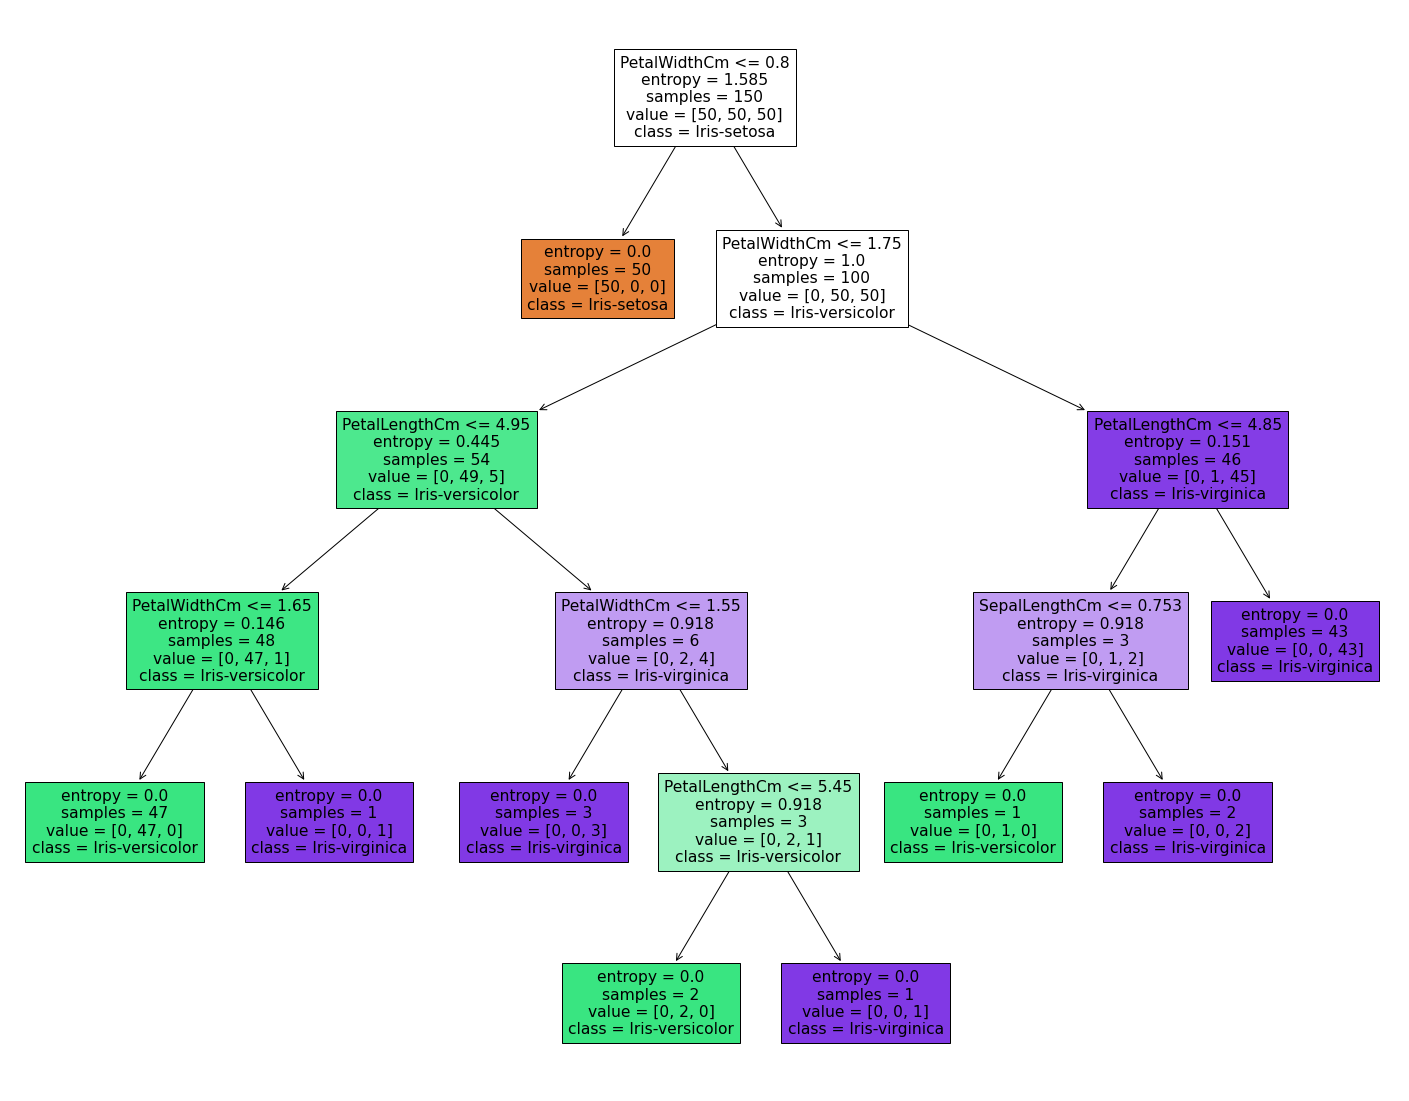

In [43]:
features = np.array(iris_df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
species = np.array(iris_df['Species'])
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
model = dtree.fit(features,species)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                   class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                   filled=True)

### Model Analysis

Let's analyse our model by checking the cross validation score for 5 folds.

In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree,features,species,cv=5)

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

Our model seems to be a good fit since the accuracy scores for vairous test-train split are very high and close to 1.